You can use **__ future __** to help to port your code from Python 2 to Python 3 today – and still have it run on Python 2.

If you already have Python 3 code, you can instead use future to offer Python 2 compatibility with almost no extra work.

In [3]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Dataset Fashion MNIST

In [34]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [20]:
train_images.shape

(60000, 28, 28)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Lets see our data

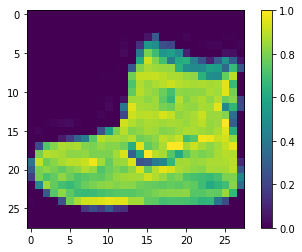

In [36]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Lets scale the values to a range between 0 to 1 before feeding to the nnm

See that the pixel values are between 0 to 255

In [35]:
train_images = train_images / 255.0

test_images = test_images / 255.0

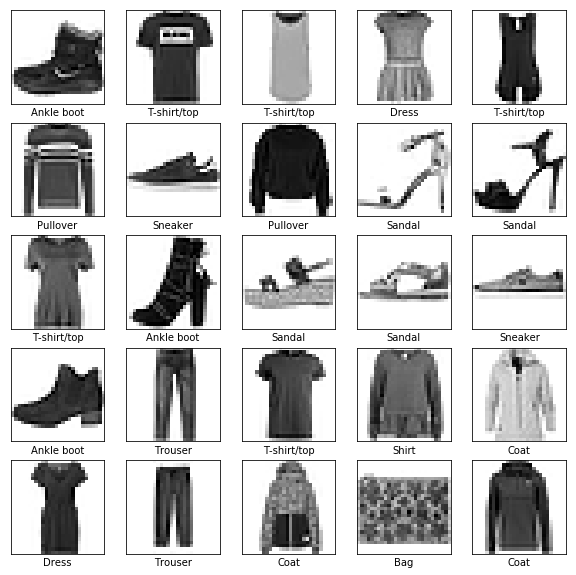

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Lets build our model

The basic building block of a nn is a layer. Layers extract representations from the data fet to them. (Hopefully this representations are some how meaningul to the problem)

MOST OF DL consists of chaining together simple layers.

In [38]:
model  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compile the model

* Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [39]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.4974 - acc: 0.8248
Epoch 2/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3762 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3389 - acc: 0.8758
Epoch 4/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3133 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2969 - acc: 0.8903


Evaluate the model

In [41]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('test accuracy: ', test_accuracy)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.3527 - acc: 0.8749
test accuracy:  0.8749


The accuracy in the training data was 89% and in the test data 87%
Why is this happening?.
This is what is call overfitting. 

**Note** Overfitting is when a ML model performs worse on new data than on their training data

In [42]:
predictions = model.predict(test_images)

In [43]:
predictions[0]

array([7.8209368e-06, 1.9461705e-08, 1.8251929e-07, 1.5135790e-08,
       1.1309565e-06, 1.7044917e-02, 4.3382283e-06, 7.3845163e-02,
       1.3072091e-06, 9.0909511e-01], dtype=float32)

In [44]:
np.argmax(predictions[0])

9

In [45]:
class_names[9]

'Ankle boot'

In [46]:
test_labels[0]

9

In [49]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label,img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color = color)

In [48]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("green")

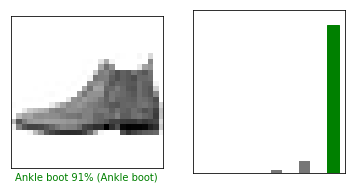

In [50]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

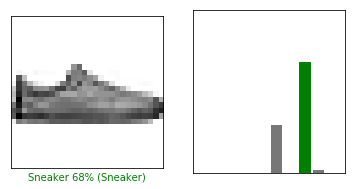

In [60]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

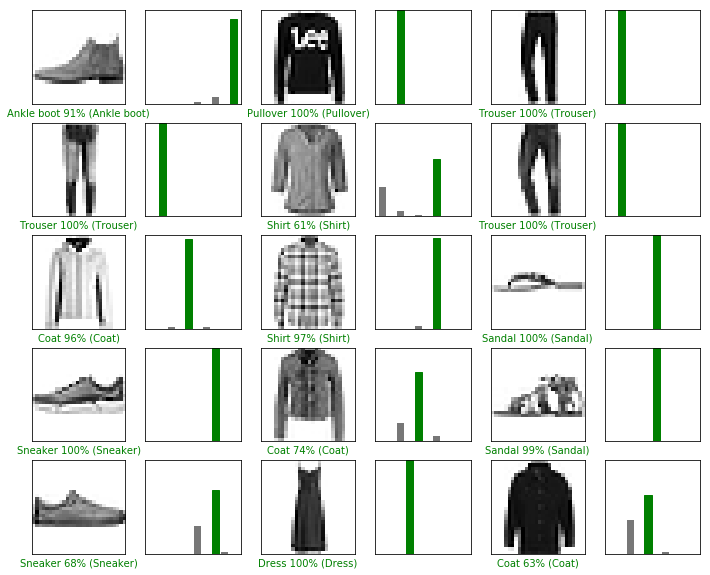

In [57]:
n = 5
m = 3
num_imgs = n*m
plt.figure(figsize=(2*2*m,2*n))
for i in range(num_imgs):
    plt.subplot(n,2*m,2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(n, 2*m, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [71]:
img = test_images[0]
print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So if using a single image, it is needed to add it to a list:

In [72]:
img= (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [73]:
predictions_single = model.predict(img)
print(predictions_single)

[[7.8209214e-06 1.9461668e-08 1.8251929e-07 1.5135761e-08 1.1309544e-06
  1.7044902e-02 4.3382242e-06 7.3845200e-02 1.3072104e-06 9.0909511e-01]]


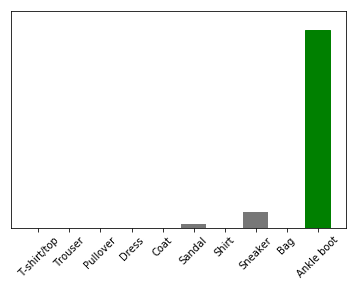

In [74]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [75]:
np.argmax(predictions_single[0])

9